# TileDB OME-Zarr Conversion

In [1]:
import sys
import os
import tiledb
import numpy as np
import cv2
import matplotlib.pylab as pylab
import zarr
import openslide as osld
sys.path.append('..')
from tiledbimg.util.convert_ome_zarr import OMEZarrConverter

## Convert SVS-TIFF to OME-Zarr



In [2]:
os.chdir('../data')
#!bioformats2raw CMU-1-Small-Region.svs.tiff CMU-1-Small-Region.ome.zarr --resolutions 1

In [3]:
zarr = zarr.open('CMU-1-Small-Region.ome.zarr')

## Convert to TileDB Slide

In [4]:
# cnv = OMEZarrConverter()
# cnv.convert_image("CMU-1-Small-Region.ome.zarr", "CMU-1-Small-Region-Zarr.tiledb", level_min=0)

## Slide Group Contents

In [5]:
a = tiledb.open("CMU-1-Small-Region-Zarr.tiledb/l_0.tdb")

In [6]:
print(a.schema)

ArraySchema(
  domain=Domain(*[
    Dim(name='X', domain=(0, 2219), tile=1024, dtype='uint64'),
    Dim(name='Y', domain=(0, 2966), tile=1024, dtype='uint64'),
  ]),
  attrs=[
    Attr(name='rgb', dtype='[('f0', 'u1'), ('f1', 'u1'), ('f2', 'u1')]', var=False, nullable=False, filters=FilterList([ZstdFilter(level=0), ])),
  ],
  cell_order='row-major',
  tile_order='row-major',
  capacity=10000,
  sparse=False,
)



## TileDB Slide Information

In [7]:
from tiledbimg.open_slide import TileDBOpenSlide

In [8]:
slide = TileDBOpenSlide.from_group_uri("CMU-1-Small-Region-Zarr.tiledb")

[DEBUG] slide_group_uri: CMU-1-Small-Region-Zarr.tiledb


In [9]:
print(slide.level_count)
print(slide.dimensions)
print(slide.level_dimensions)
print(slide.level_downsamples)
print(slide.level_info)

3
(2220, 2967)
((2220, 2967), (387, 463), (1280, 431))
None
[LevelInfo(level=0, shape=(2220, 2967)), LevelInfo(level=1, shape=(387, 463)), LevelInfo(level=2, shape=(1280, 431))]


## Reading Slide Data

In [10]:
img = slide.read_region((0,0), 0, slide.dimensions)

In [11]:
new_img = np.zeros((img.shape[0], img.shape[1], 3))
for i in range(img.shape[0]): 
    for j in range(img.shape[1]):
        for k in range(3):
            new_img[i,j,k] = img[i,j][k]

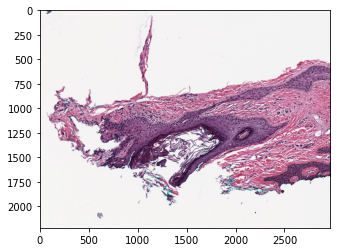

In [12]:
norm_new_img = cv2.normalize(src=new_img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
pylab.imshow(norm_new_img)